<a href="https://colab.research.google.com/github/TiaErikaDev/Projeto_Bigdata/blob/main/Projeto_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> FACULDADE MÉTODO DE SÃO PAULO / FLAI

> MBA DATA SCIENCE

> ÉRIKA MAYARA DE OLIVEIRA PIMENTEL





# **INTRODUÇÃO**

Explorando o Mercado de Trabalho em Dados com Tecnologias de Big Data

Nos últimos anos, o campo de análise de dados tem se tornado uma peça fundamental para empresas e organizações em todo o mundo. A capacidade de coletar, processar e analisar grandes volumes de dados está impulsionando a tomada de decisões informadas e estratégicas, fornecendo uma vantagem competitiva significativa. No Brasil, esse cenário não é diferente, e o mercado de trabalho na área de dados está passando por mudanças profundas e aceleradas.

Nesse contexto de constante evolução, é crucial compreender as tendências e características que moldam o mercado de trabalho de dados no Brasil. Este projeto se baseia nos dados do State of Data Brazil 2022, uma pesquisa abrangente conduzida pela Data Hackers, a maior comunidade de dados do Brasil, em colaboração com a renomada consultoria global Bain & Company. Essa pesquisa visa mapear e entender o mercado de trabalho de dados no Brasil, representando uma fonte rica de informações que pode orientar profissionais, empresas e formuladores de políticas na área de dados.

O mercado de trabalho de dados no Brasil enfrenta uma série de desafios e oportunidades únicos. A crescente demanda por profissionais qualificados em dados, como analistas de dados, cientistas de dados e engenheiros de dados, reflete a importância crítica desses especialistas na economia digital. No entanto, a dinâmica desse mercado é complexa, influenciada por fatores demográficos, econômicos e tecnológicos.

Profissionais de dados estão envolvidos em uma variedade de setores, desde finanças e saúde até marketing e varejo. Eles desempenham papéis cruciais na extração de informações valiosas a partir de dados brutos, que podem orientar estratégias de negócios, melhorar a eficiência operacional e até mesmo catalisar a inovação. Nesse cenário dinâmico, é vital entender quem são esses profissionais, de onde vêm, como evoluem em suas carreiras e quais são suas aspirações.

# **OBJETIVOS**

**Perfil Demográfico e de Formação**: Analisar o perfil demográfico dos profissionais de dados no Brasil, incluindo idade, gênero, raça/etnia, presença de PCD (Pessoa com Deficiência), localização geográfica e formação educacional. Isso ajudará a compreender a diversidade desse grupo.

**Carreira em Dados**: Investigar a situação atual de trabalho, setores de atuação, cargos ocupados, níveis hierárquicos, faixas salariais e tempo de experiência na área de dados. Essa análise oferecerá insights sobre o crescimento profissional na área.

**Busca por Oportunidades**: Avaliar o tempo que os profissionais passaram buscando oportunidades na área de dados e as linguagens de programação mais utilizadas em seu trabalho. Essas informações podem destacar tendências emergentes no campo de dados.


# **Hipóteses**



1.   Profissionais mais jovens têm maior probabilidade de estar buscando oportunidades na área de dados, refletindo o dinamismo do mercado.

2.   A remuneração média na área de dados varia significativamente entre diferentes setores de atuação, indicando disparidades salariais.

3. Profissionais com mais tempo de experiência tendem a ocupar cargos de nível hierárquico mais elevado, sugerindo um caminho de crescimento profissional.

4. Existe uma correlação entre a faixa salarial e o nível de satisfação no ambiente de trabalho, influenciando a retenção de talentos.

5. Determinadas linguagens de programação são mais prevalentes em determinados setores de atuação, revelando preferências tecnológicas.



### Instalando  Pyspark

In [1]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=1cdc44ba09f4becb62d3a9166e26a946bbbde6520ae4a08518257c7235a63b50
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:

# Instalar as dependências

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
!tar xf spark-3.4.1-bin-hadoop3.tgz
!pip install -q findspark


In [3]:
# Configurar as variáveis de ambiente

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"

# Tornar o PySpark "importável"

import findspark
findspark.init('spark-3.4.1-bin-hadoop3')

In [4]:

# Criando sessão do Spark

from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local[*]').getOrCreate()
sc = spark.sparkContext

### Importando as bibliotecas

In [5]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
from pyspark.sql.functions import *
from pyspark.sql import functions as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Leitura do dataframe

In [7]:
df = spark.read.csv('/content/State_of_data_2022.csv', inferSchema=True, header=True)
df

DataFrame[('P0', 'id'): string, ('P1_a ', 'Idade'): int, ('P1_a_1 ', 'Faixa idade'): string, ('P1_b ', 'Genero'): string, ('P1_c ', 'Cor/raca/etnia'): string, ('P1_d ', 'PCD'): string, ('P1_e ', 'experiencia_profissional_prejudicada'): string, ('P1_f ', 'aspectos_prejudicados'): string, ('P1_g ', 'vive_no_brasil'): boolean, ('P1_i ', 'Estado onde mora'): string, ('P1_i_1 ', 'uf onde mora'): string, ('P1_i_2 ', 'Regiao onde mora'): string, ('P1_j ', 'Mudou de Estado?'): boolean, ('P1_k ', 'Regiao de origem'): string, ('P1_l ', 'Nivel de Ensino'): string, ('P1_m ', 'Área de Formação'): string, ('P2_a ', 'Qual sua situação atual de trabalho?'): string, ('P2_b ', 'Setor'): string, ('P2_c ', 'Numero de Funcionarios'): string, ('P2_d ', 'Gestor?'): boolean, ('P2_e ', 'Cargo como Gestor'): string, ('P2_f ', 'Cargo Atual'): string, ('P2_g ', 'Nivel'): string, ('P2_h ', 'Faixa salarial'): string, ('P2_i ', 'Quanto tempo de experiência na área de dados você tem?'): string, ('P2_j ', 'Quanto temp

In [8]:
df.show(5)

+--------------------+------------------+--------------------------+-------------------+---------------------------+----------------+-------------------------------------------------+----------------------------------+---------------------------+-----------------------------+---------------------------+-------------------------------+-----------------------------+-----------------------------+----------------------------+-----------------------------+-------------------------------------------------+------------------+-----------------------------------+--------------------+------------------------------+------------------------+------------------+---------------------------+-------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------+---------------------------------------------------------

### Selecionando as colunas de interesse

In [9]:
df_final = df.select("('P0', 'id')", "('P1_a ', 'Idade')", "('P1_a_1 ', 'Faixa idade')", "('P1_b ', 'Genero')", "('P1_c ', 'Cor/raca/etnia')", "('P1_d ', 'PCD')", "('P1_g ', 'vive_no_brasil')",
          "('P1_i ', 'Estado onde mora')", "('P1_i_1 ', 'uf onde mora')", "('P1_i_2 ', 'Regiao onde mora')", "('P1_l ', 'Nivel de Ensino')", "('P1_m ', 'Área de Formação')",
          "('P2_a ', 'Qual sua situação atual de trabalho?')", "('P2_b ', 'Setor')", "('P2_d ', 'Gestor?')", "('P2_e ', 'Cargo como Gestor')", "('P2_f ', 'Cargo Atual')", "('P2_g ', 'Nivel')",
          "('P2_h ', 'Faixa salarial')", "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')", "('P2_p ', 'Atualmente qual a sua forma de trabalho?')",
          "('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')", "('P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?')")
df_final.show()

+--------------------+------------------+--------------------------+-------------------+---------------------------+----------------+---------------------------+-----------------------------+---------------------------+-------------------------------+----------------------------+-----------------------------+-------------------------------------------------+--------------------+--------------------+------------------------------+------------------------+------------------+---------------------------+-------------------------------------------------------------------+-----------------------------------------------------+---------------------------------------------------------------------------------------------+--------------------------------------------------------------------------+
|        ('P0', 'id')|('P1_a ', 'Idade')|('P1_a_1 ', 'Faixa idade')|('P1_b ', 'Genero')|('P1_c ', 'Cor/raca/etnia')|('P1_d ', 'PCD')|('P1_g ', 'vive_no_brasil')|('P1_i ', 'Estado onde mora')|('P1_i_1 ', 

In [10]:
#Resumo das colunas
df_final.printSchema()

root
 |-- ('P0', 'id'): string (nullable = true)
 |-- ('P1_a ', 'Idade'): integer (nullable = true)
 |-- ('P1_a_1 ', 'Faixa idade'): string (nullable = true)
 |-- ('P1_b ', 'Genero'): string (nullable = true)
 |-- ('P1_c ', 'Cor/raca/etnia'): string (nullable = true)
 |-- ('P1_d ', 'PCD'): string (nullable = true)
 |-- ('P1_g ', 'vive_no_brasil'): boolean (nullable = true)
 |-- ('P1_i ', 'Estado onde mora'): string (nullable = true)
 |-- ('P1_i_1 ', 'uf onde mora'): string (nullable = true)
 |-- ('P1_i_2 ', 'Regiao onde mora'): string (nullable = true)
 |-- ('P1_l ', 'Nivel de Ensino'): string (nullable = true)
 |-- ('P1_m ', 'Área de Formação'): string (nullable = true)
 |-- ('P2_a ', 'Qual sua situação atual de trabalho?'): string (nullable = true)
 |-- ('P2_b ', 'Setor'): string (nullable = true)
 |-- ('P2_d ', 'Gestor?'): boolean (nullable = true)
 |-- ('P2_e ', 'Cargo como Gestor'): string (nullable = true)
 |-- ('P2_f ', 'Cargo Atual'): string (nullable = true)
 |-- ('P2_g ', 'Ni

### Limpeza e tratamento dos dados

In [11]:
#Alterando o nome das colunas

renaming_dict = {
    "('P0', 'id')": "ID",
    "('P1_a ', 'Idade')": "Idade",
    "('P1_a_1 ', 'Faixa idade')": "Faixa idade",
    "('P1_b ', 'Genero')": "Genero",
    "('P1_c ', 'Cor/raca/etnia')": "Cor/raca/etnia",
    "('P1_d ', 'PCD')": "PCD",
    "('P1_g ', 'vive_no_brasil')": "vive_no_brasil",
    "('P1_i ', 'Estado onde mora')": "Estado onde mora",
    "('P1_i_1 ', 'uf onde mora')": "uf onde mora",
    "('P1_i_2 ', 'Regiao onde mora')": "Regiao onde mora",
    "('P1_l ', 'Nivel de Ensino')": "Nivel de Ensino",
    "('P1_m ', 'Área de Formação')": "Área de Formação",
    "('P2_a ', 'Qual sua situação atual de trabalho?')": "Qual sua situação atual de trabalho?",
    "('P2_b ', 'Setor')": "Setor",
    "('P2_d ', 'Gestor?')": "Gestor?",
    "('P2_e ', 'Cargo como Gestor')": "Cargo como Gestor",
    "('P2_f ', 'Cargo Atual')": "Cargo Atual",
    "('P2_g ', 'Nivel')": "Nivel",
    "('P2_h ', 'Faixa salarial')": "Faixa salarial",
    "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')": "Quanto tempo de experiência na área de dados você tem?",
    "('P2_p ', 'Atualmente qual a sua forma de trabalho?')": "Atualmente qual a sua forma de trabalho?",
    "('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')": "Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?",
    "('P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?')": "Há quanto tempo você busca uma oportunidade na área de dados?",
}


for current_name, new_name in renaming_dict.items():
    df_final = df_final.withColumnRenamed(current_name, new_name)

df_final.show()


+--------------------+-----+-----------+---------+--------------+---+--------------+--------------------+------------+----------------+--------------------+--------------------+------------------------------------+--------------------+-------+--------------------+--------------------+------+--------------------+------------------------------------------------------+----------------------------------------+--------------------------------------------------------------------------------+-------------------------------------------------------------+
|                  ID|Idade|Faixa idade|   Genero|Cor/raca/etnia|PCD|vive_no_brasil|    Estado onde mora|uf onde mora|Regiao onde mora|     Nivel de Ensino|    Área de Formação|Qual sua situação atual de trabalho?|               Setor|Gestor?|   Cargo como Gestor|         Cargo Atual| Nivel|      Faixa salarial|Quanto tempo de experiência na área de dados você tem?|Atualmente qual a sua forma de trabalho?|Entre as linguagens listadas abaixo, q

In [12]:
#Transformando valores
df_final = df_final.withColumn("PCD", when(df_final["PCD"] == "Sim", 1).otherwise(0))
df_final = df_final.withColumn("Nivel", when(col("Nivel").isNull(), "Outro").otherwise(col("Nivel")))

In [13]:
#criar uma coluna numérica 'Salario Numerico' com valores médios para cada faixa salarial
df_final = df_final.withColumn("Salario Numerico",
    when(col("Faixa salarial") == "Acima de R$ 40.001/mês", 45000)
    .when(col("Faixa salarial") == "de R$ 6.001/mês a R$ 8.000/mês", 7000)
    .when(col("Faixa salarial") == "de R$ 12.001/mês a R$ 16.000/mês", 14000)
    .when(col("Faixa salarial") == "de R$ 1.001/mês a R$ 2.000/mês", 1500)
    .when(col("Faixa salarial") == "de R$ 30.001/mês a R$ 40.000/mês", 35000)
    .when(col("Faixa salarial") == "de R$ 3.001/mês a R$ 4.000/mês", 3500)
    .when(col("Faixa salarial") == "de R$ 25.001/mês a R$ 30.000/mês", 27500)
    .when(col("Faixa salarial") == "de R$ 20.001/mês a R$ 25.000/mês", 22500)
    .when(col("Faixa salarial") == "Menos de R$ 1.000/mês", 500)
    .when(col("Faixa salarial") == "de R$ 16.001/mês a R$ 20.000/mês", 18000)
    .when(col("Faixa salarial") == "de R$ 8.001/mês a R$ 12.000/mês", 10000)
    .when(col("Faixa salarial") == "de R$ 2.001/mês a R$ 3.000/mês", 2500)
    .when(col("Faixa salarial") == "de R$ 4.001/mês a R$ 6.000/mês", 5000)
    .otherwise(0)
)

In [14]:
#Transformando os tipos de dados
df_final = df_final.withColumn("Salario Numerico", col("Salario Numerico").cast("int"))
df_final = df_final.withColumn("Idade", df_final["Idade"].cast("int"))

In [15]:
#removendo o estado em () da coluna 'Estado ondde mora'
colunas = df_final.columns
for coluna in colunas:
    df_final = df_final.withColumn(coluna, regexp_replace(col(coluna), r'\(.*\)', ''))

df_final.show()


+--------------------+-----+-----------+---------+--------------+---+--------------+-------------------+------------+----------------+--------------------+--------------------+------------------------------------+--------------------+-------+--------------------+--------------------+------+--------------------+------------------------------------------------------+----------------------------------------+--------------------------------------------------------------------------------+-------------------------------------------------------------+----------------+
|                  ID|Idade|Faixa idade|   Genero|Cor/raca/etnia|PCD|vive_no_brasil|   Estado onde mora|uf onde mora|Regiao onde mora|     Nivel de Ensino|    Área de Formação|Qual sua situação atual de trabalho?|               Setor|Gestor?|   Cargo como Gestor|         Cargo Atual| Nivel|      Faixa salarial|Quanto tempo de experiência na área de dados você tem?|Atualmente qual a sua forma de trabalho?|Entre as linguagens lis

In [16]:
#Excluindo linhas
df_final = df_final.filter(df_final["Genero"].isNotNull())
df_final = df_final.filter(df_final["Regiao onde mora"].isNotNull())
df_final = df_final.filter(df_final["Idade"].isNotNull())

### Análise descritiva inicial

In [17]:
#Resumo Estatístico
df_final.describe().show()

+-------+--------------------+------------------+-----------+--------------------+--------------+--------------------+--------------+----------------+------------+----------------+----------------+--------------------+------------------------------------+-------------------+-------+--------------------+--------------------+------+--------------------+------------------------------------------------------+----------------------------------------+--------------------------------------------------------------------------------+-------------------------------------------------------------+-----------------+
|summary|                  ID|             Idade|Faixa idade|              Genero|Cor/raca/etnia|                 PCD|vive_no_brasil|Estado onde mora|uf onde mora|Regiao onde mora| Nivel de Ensino|    Área de Formação|Qual sua situação atual de trabalho?|              Setor|Gestor?|   Cargo como Gestor|         Cargo Atual| Nivel|      Faixa salarial|Quanto tempo de experiência na área 

In [18]:
#Contagem de Linhas e Colunas
print("Número de linhas:", df_final.count())
print("Número de colunas:", len(df_final.columns))

Número de linhas: 4089
Número de colunas: 24


In [19]:
#Distribuição de Variáveis Categóricas
categorias = ["Faixa idade","Genero", "Cor/raca/etnia", "Salario Numerico", "Regiao onde mora", "Nivel"]
for coluna in categorias:
    df_final.groupBy(coluna).count().show()

+-----------+-----+
|Faixa idade|count|
+-----------+-----+
|      30-34| 1050|
|      22-24|  444|
|      17-21|  146|
|      50-54|   88|
|      35-39|  578|
|      45-49|  140|
|      25-29| 1371|
|      40-44|  272|
+-----------+-----+

+--------------------+-----+
|              Genero|count|
+--------------------+-----+
|Prefiro não informar|   10|
|            Feminino| 1017|
|           Masculino| 3062|
+--------------------+-----+

+--------------------+-----+
|      Cor/raca/etnia|count|
+--------------------+-----+
|            Indígena|    9|
|Prefiro não informar|   25|
|               Preta|  277|
|             Amarela|  121|
|              Branca| 2632|
|               Outra|   15|
|               Parda| 1010|
+--------------------+-----+

+----------------+-----+
|Salario Numerico|count|
+----------------+-----+
|           14000|  419|
|            1500|  213|
|            5000|  573|
|           22500|  126|
|           10000|  732|
|               0|  528|
|         

### Visualização de Dados

Gráfico de Barras (Bar Chart):


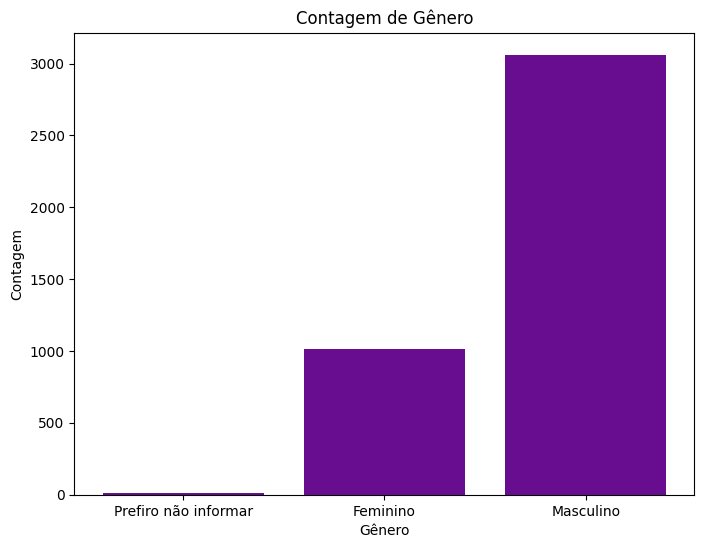

In [20]:
#Gráfico de barras para a contagem de gênero

contagem_genero = df_final.groupBy("Genero").count().toPandas()

plt.figure(figsize=(8, 6))
plt.bar(contagem_genero["Genero"], contagem_genero["count"], color='#680d90')
plt.title("Contagem de Gênero")
plt.xlabel("Gênero")
plt.ylabel("Contagem")
plt.show()

Histogramas (Histogram):


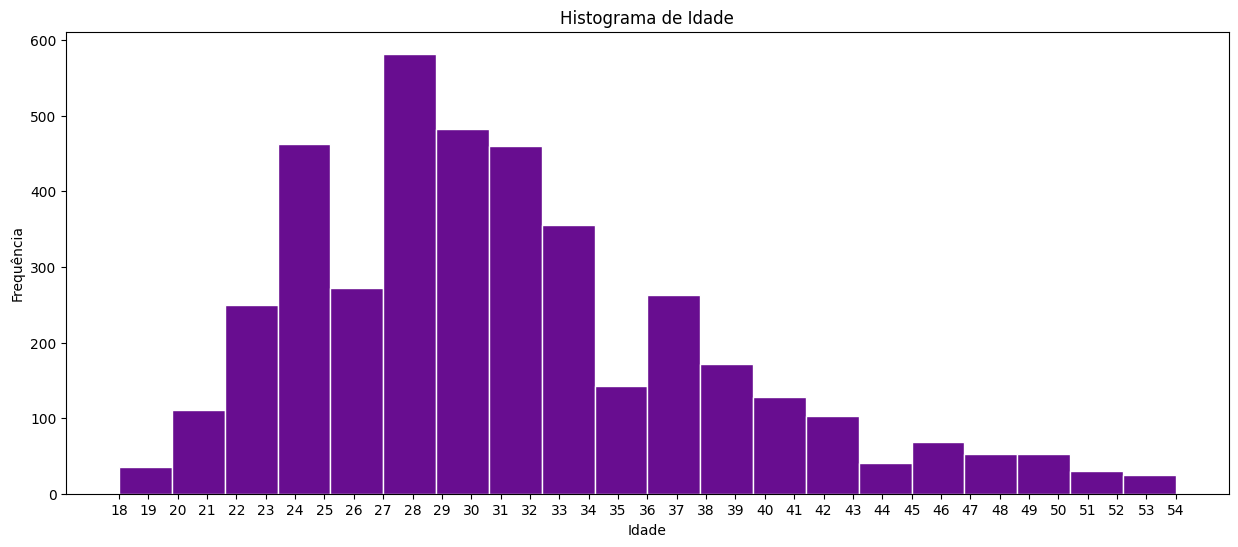

In [21]:
#Histograma para a coluna 'Idade'

idade = df_final.select("Idade").toPandas()
idade_sorted = idade.sort_values(by="Idade")


plt.figure(figsize=(15, 6))
plt.hist(idade_sorted["Idade"], bins=20, color='#680d90', edgecolor='white')
plt.title("Histograma de Idade")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

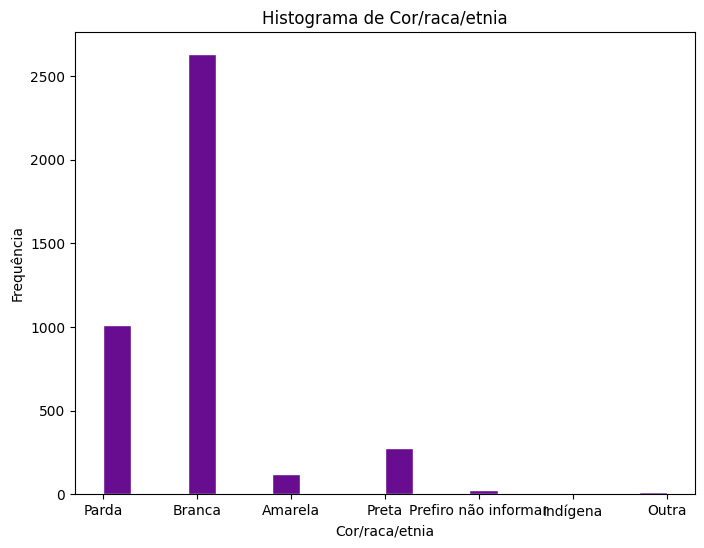

In [22]:
raca_cor = df_final.select("Cor/raca/etnia").toPandas()

plt.figure(figsize=(8, 6))
plt.hist(raca_cor["Cor/raca/etnia"], bins=20, color='#680d90', edgecolor='white')
plt.title("Histograma de Cor/raca/etnia")
plt.xlabel("Cor/raca/etnia")
plt.ylabel("Frequência")
plt.show()


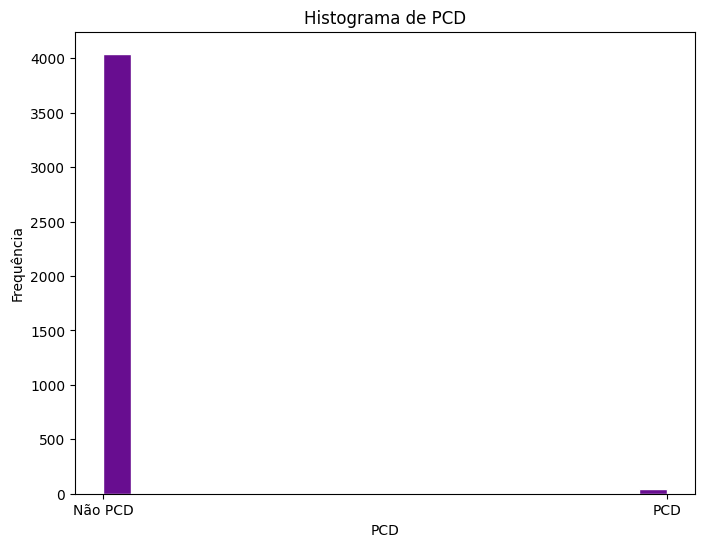

In [23]:
pcd = df_final.select("PCD").toPandas()

plt.figure(figsize=(8, 6))
plt.hist(pcd["PCD"], bins=20, color='#680d90', edgecolor='white')
plt.title("Histograma de PCD")
plt.xlabel("PCD")
plt.ylabel("Frequência")
plt.xticks([0, 1], ['Não PCD', 'PCD'])
plt.show()


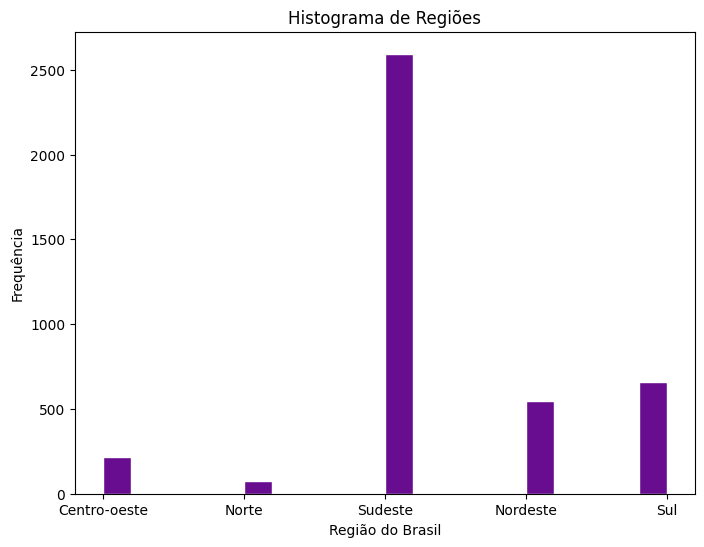

In [24]:
Regiao = df_final.select("Regiao onde mora").toPandas()

plt.figure(figsize=(8, 6))
plt.hist(Regiao["Regiao onde mora"], bins=20, color='#680d90', edgecolor='white')
plt.title("Histograma de Regiões")
plt.xlabel("Região do Brasil")
plt.ylabel("Frequência")
plt.show()

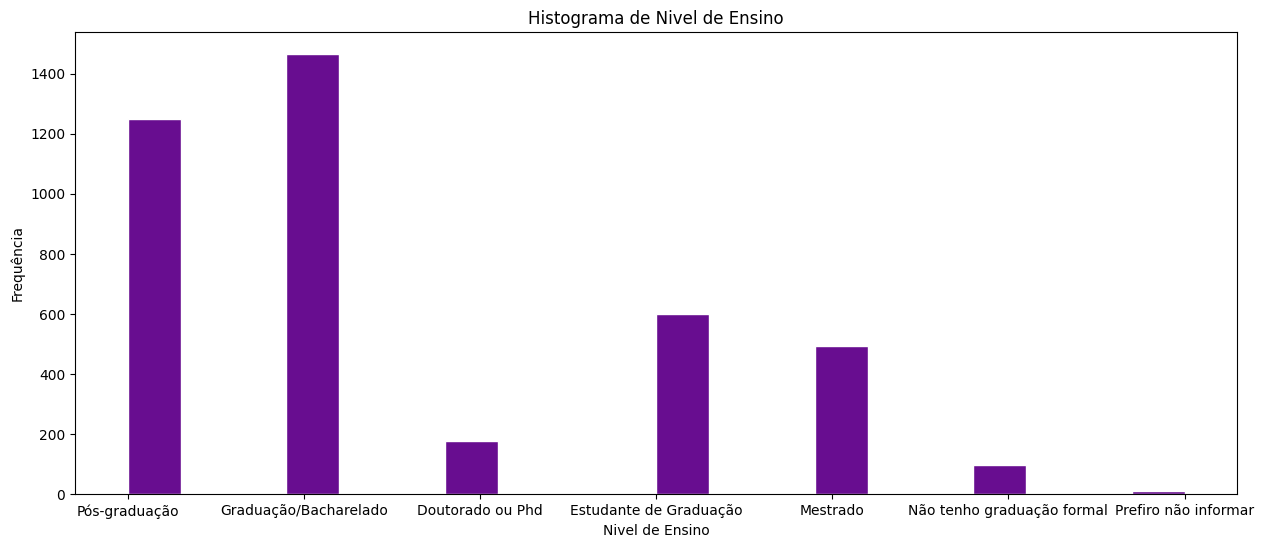

In [25]:
Nivel_de_Ensino = df_final.select("Nivel de Ensino").toPandas()

plt.figure(figsize=(15, 6))
plt.hist(Nivel_de_Ensino["Nivel de Ensino"], bins=20, color='#680d90', edgecolor='white')
plt.title("Histograma de Nivel de Ensino")
plt.xlabel("Nivel de Ensino")
plt.ylabel("Frequência")
plt.show()


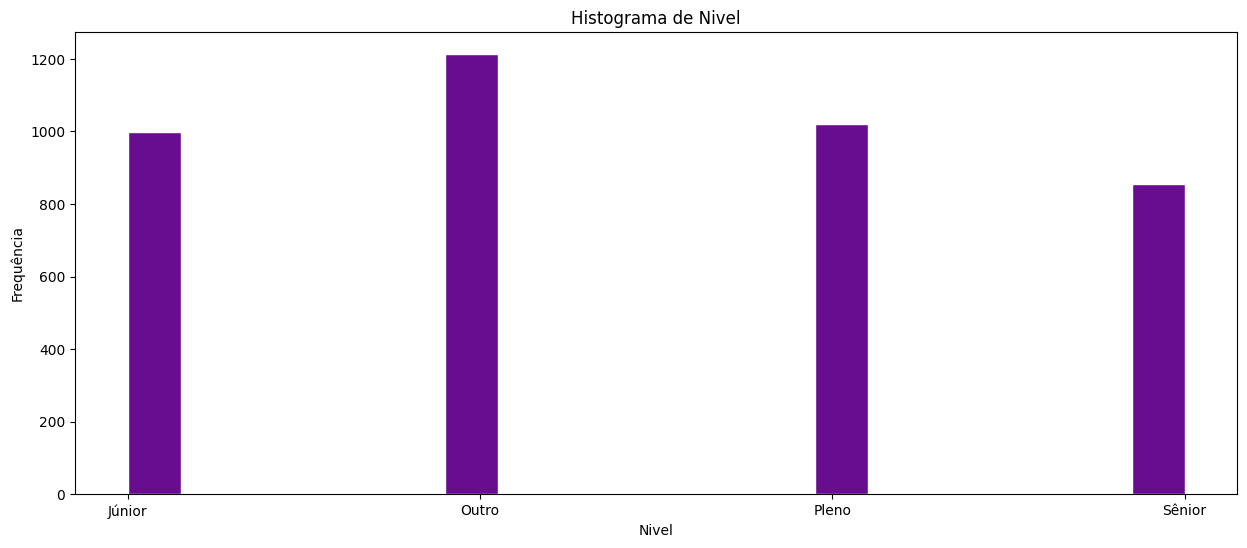

In [26]:
Nivel = df_final.select("Nivel").toPandas()

plt.figure(figsize=(15, 6))
plt.hist(Nivel["Nivel"], bins=20, color='#680d90', edgecolor='white')
plt.title("Histograma de Nivel")
plt.xlabel("Nivel")
plt.ylabel("Frequência")
plt.show()



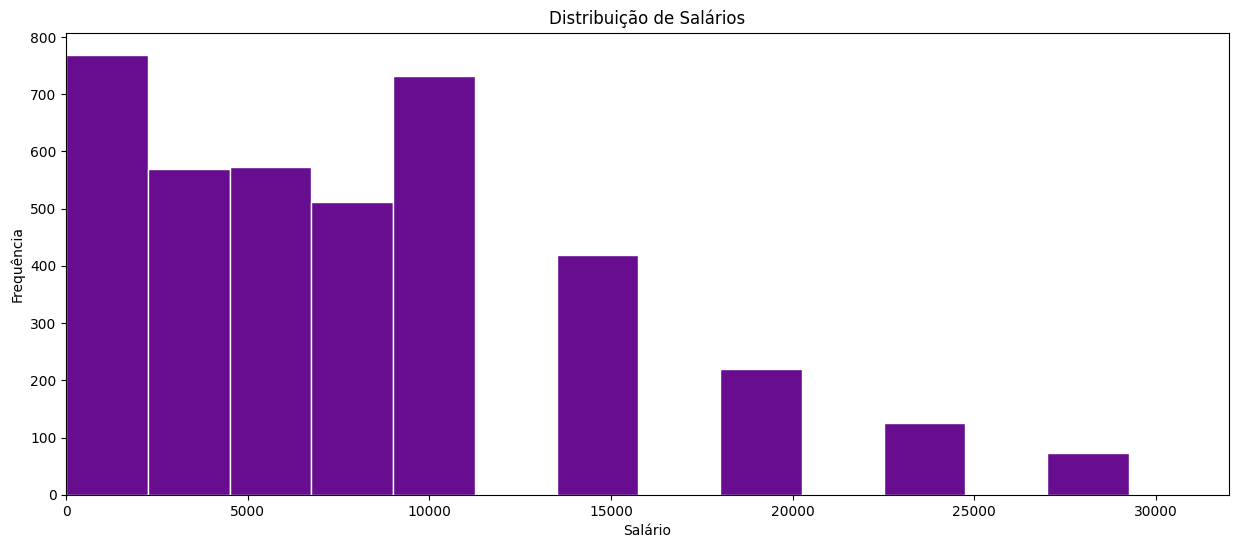

In [43]:
salarios_numericos = df_final.select("Salario Numerico").toPandas()
salarios_numericos["Salario Numerico"] = salarios_numericos["Salario Numerico"].astype(float)

plt.figure(figsize=(15, 6))
plt.hist(salarios_numericos["Salario Numerico"], bins=20, color='#680d90', edgecolor='white')
plt.title("Distribuição de Salários")
plt.xlabel("Salário")
plt.ylabel("Frequência")
plt.xlim(0, 32000)
plt.show()

# **Hipóteses**

### Profissionais mais jovens têm maior probabilidade de estar buscando oportunidades na área de dados, refletindo o dinamismo do mercado.




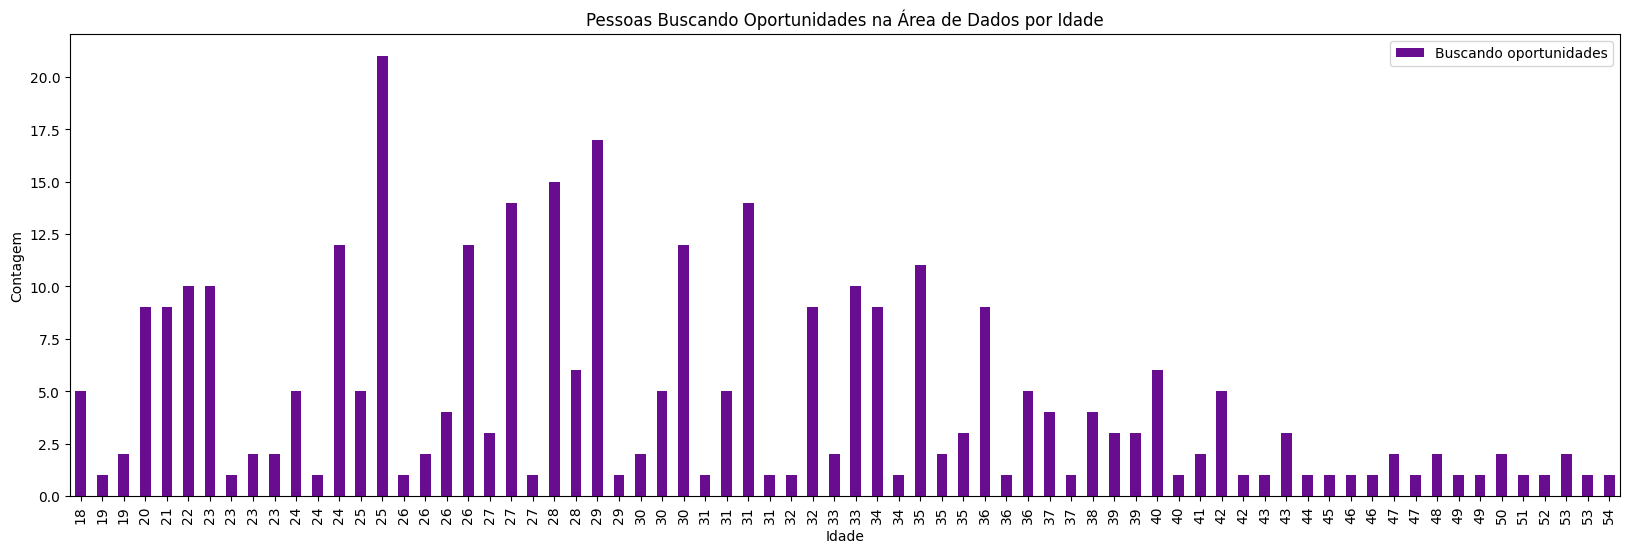

In [45]:
# Filtrar os dados para incluir apenas aqueles que estão buscando oportunidades
buscando_oportunidades = df_final.filter(col("Há quanto tempo você busca uma oportunidade na área de dados?") != 'None')

# Realizar o agrupamento e contagem
buscando_oportunidades = buscando_oportunidades.groupBy("Há quanto tempo você busca uma oportunidade na área de dados?", "Idade").count()

# Ordenar o resultado em ordem crescente da Idade
buscando_oportunidades = buscando_oportunidades.sort("Idade", ascending=True)

# Renomear a coluna "count" para "Buscando oportunidades"
buscando_oportunidades = buscando_oportunidades.withColumnRenamed("count", "Buscando oportunidades")

# Converter para DataFrame Pandas
df_pandas = buscando_oportunidades.toPandas()

# Criar o gráfico de barras
df_pandas.plot(kind='bar', x="Idade", y="Buscando oportunidades", color='#680d90', figsize=(20, 6))
plt.title('Pessoas Buscando Oportunidades na Área de Dados por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show();


### A remuneração média na área de dados varia significativamente entre diferentes setores de atuação, indicando disparidades salariais.

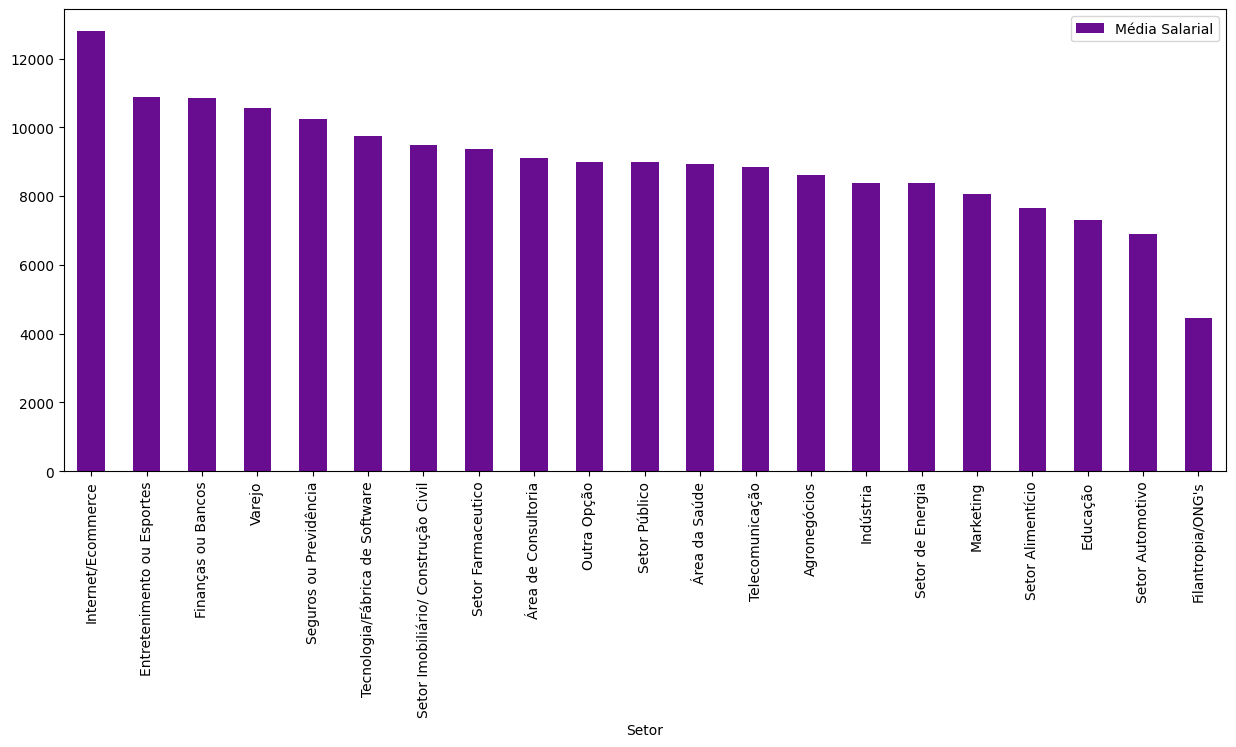

In [29]:
# Filtrar os dados para incluir apenas as colunas necessárias (Salário Numérico e Setor)
salario_por_setor = df_final.select("Salario Numerico", "Setor").filter(col("Setor") != "None")

# Agrupar os dados por setor e calcular a média salarial
media_salarial_por_setor = salario_por_setor.groupBy("Setor").agg(F.mean("Salario Numerico").alias("Média Salarial"))

# Ordenar os resultados em ordem decrescente de média salarial
media_salarial_por_setor = media_salarial_por_setor.sort("Média Salarial", ascending=False)

# Converter os resultados para um DataFrame Pandas
df_pandas = media_salarial_por_setor.toPandas()
df_pandas.plot(kind='bar', x="Setor", y="Média Salarial", color='#680d90', figsize=(15, 6));


### Profissionais com mais tempo de experiência tendem a ocupar cargos de nível hierárquico mais elevado, sugerindo um caminho de crescimento profissional.

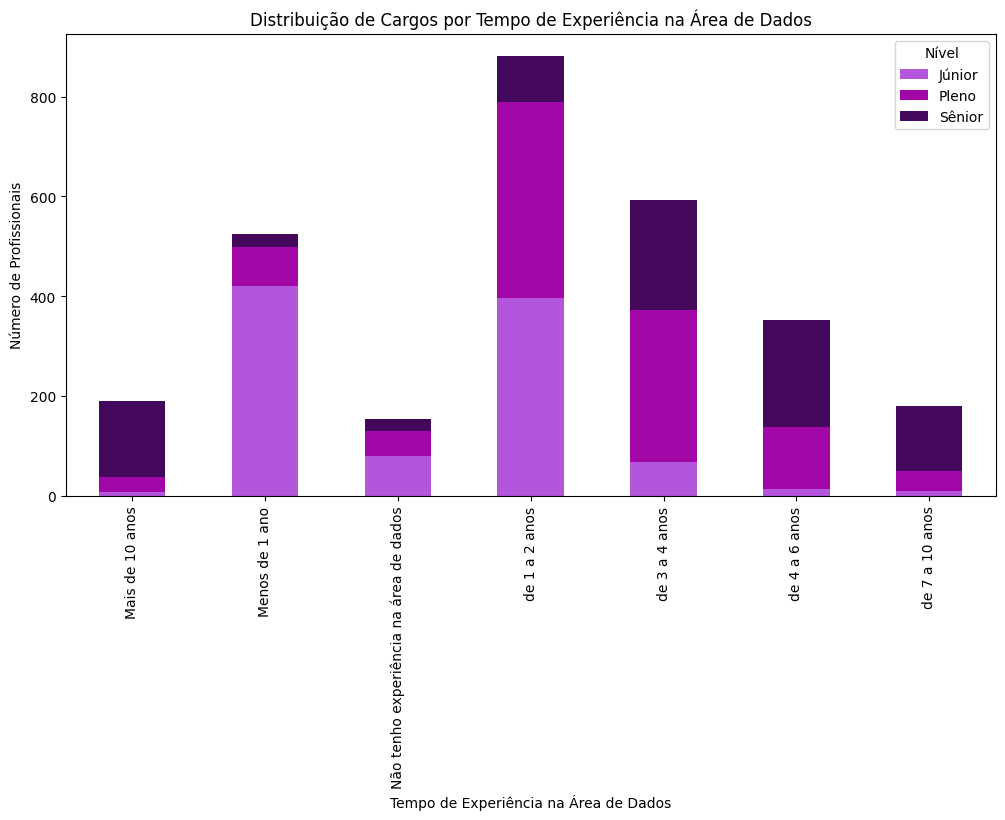

In [30]:
# Filtrar os dados para incluir apenas as colunas necessárias (Nível e Quanto tempo de experiência)
nivel_experiencia = df_final.select("Nivel", "Quanto tempo de experiência na área de dados você tem?").filter(col("Quanto tempo de experiência na área de dados você tem?") != "None").filter(col("Nivel") != "Outro")

# Realizar o agrupamento e contagem
contagem_por_nivel_experiencia = nivel_experiencia.groupBy("Nivel", "Quanto tempo de experiência na área de dados você tem?").count()

# Ordenar o resultado em ordem crescente do tempo de experiência
contagem_por_nivel_experiencia = contagem_por_nivel_experiencia.sort("Quanto tempo de experiência na área de dados você tem?", ascending=True)

# Converter os resultados para um DataFrame Pandas
df_pandas_contagem = contagem_por_nivel_experiencia.toPandas()

# Criar um gráfico de barras empilhadas para visualizar a distribuição de cargos por faixa de tempo de experiência
pivot_df = df_pandas_contagem.pivot(index="Quanto tempo de experiência na área de dados você tem?", columns="Nivel", values="count")
pivot_df.plot(kind='bar', stacked=True, color=['#B356DB', '#A107A6', '#43085C'], figsize=(12, 6))
plt.title('Distribuição de Cargos por Tempo de Experiência na Área de Dados')
plt.xlabel('Tempo de Experiência na Área de Dados')
plt.ylabel('Número de Profissionais')
plt.legend(title='Nível')
plt.show()

### Existe uma diferença entre a faixa salarial e o nível de ensino.

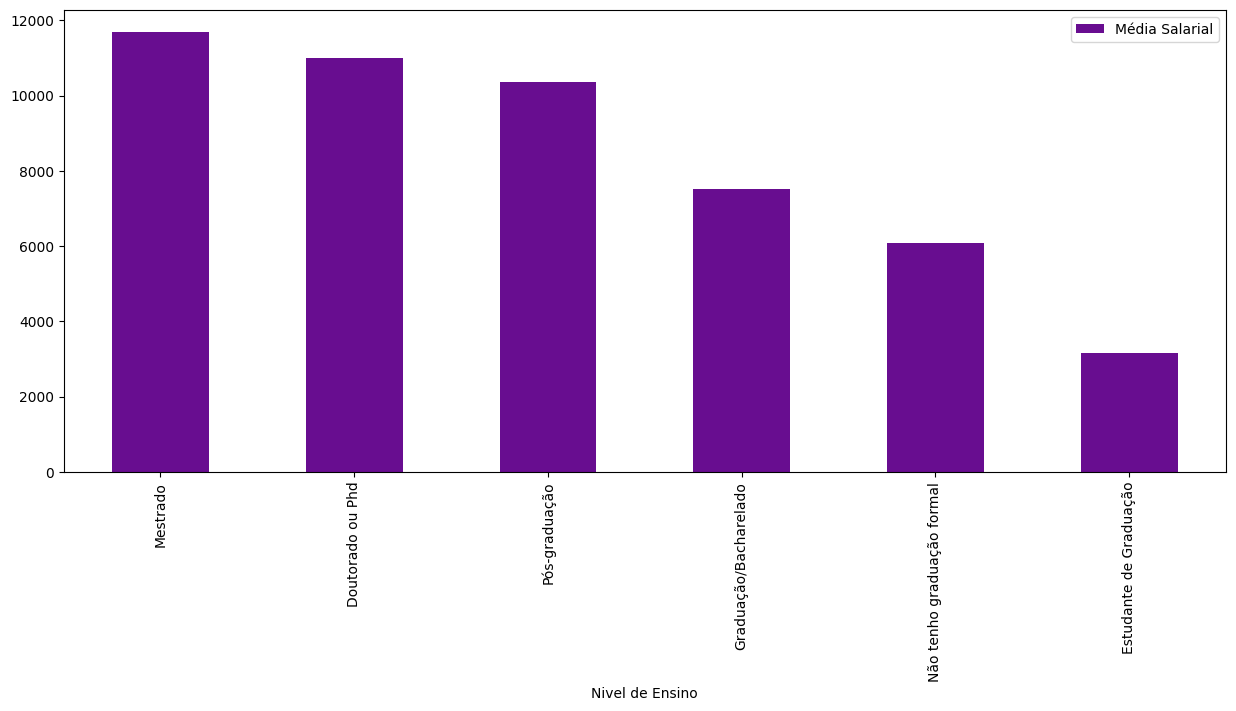

In [31]:
# Filtrar os dados para incluir apenas as colunas necessárias (Salario Numérico e Setor)
salario_por_setor = df_final.select("Salario Numerico", "Nivel de Ensino").filter(col("Nivel de Ensino") != "Prefiro não informar")

# Agrupar os dados por setor e calcular a média salarial
media_salarial_por_setor = salario_por_setor.groupBy("Nivel de Ensino").agg(F.mean("Salario Numerico").alias("Média Salarial"))

# Ordenar os resultados em ordem decrescente de média salarial
media_salarial_por_setor = media_salarial_por_setor.sort("Média Salarial", ascending=False)

# Converter os resultados para um DataFrame Pandas
df_pandas = media_salarial_por_setor.toPandas()
df_pandas.plot(kind='bar', x="Nivel de Ensino", y="Média Salarial", color='#680d90', figsize=(15, 6));


### Determinadas linguagens de programação são mais prevalentes em determinados setores de atuação, revelando preferências tecnológicas.

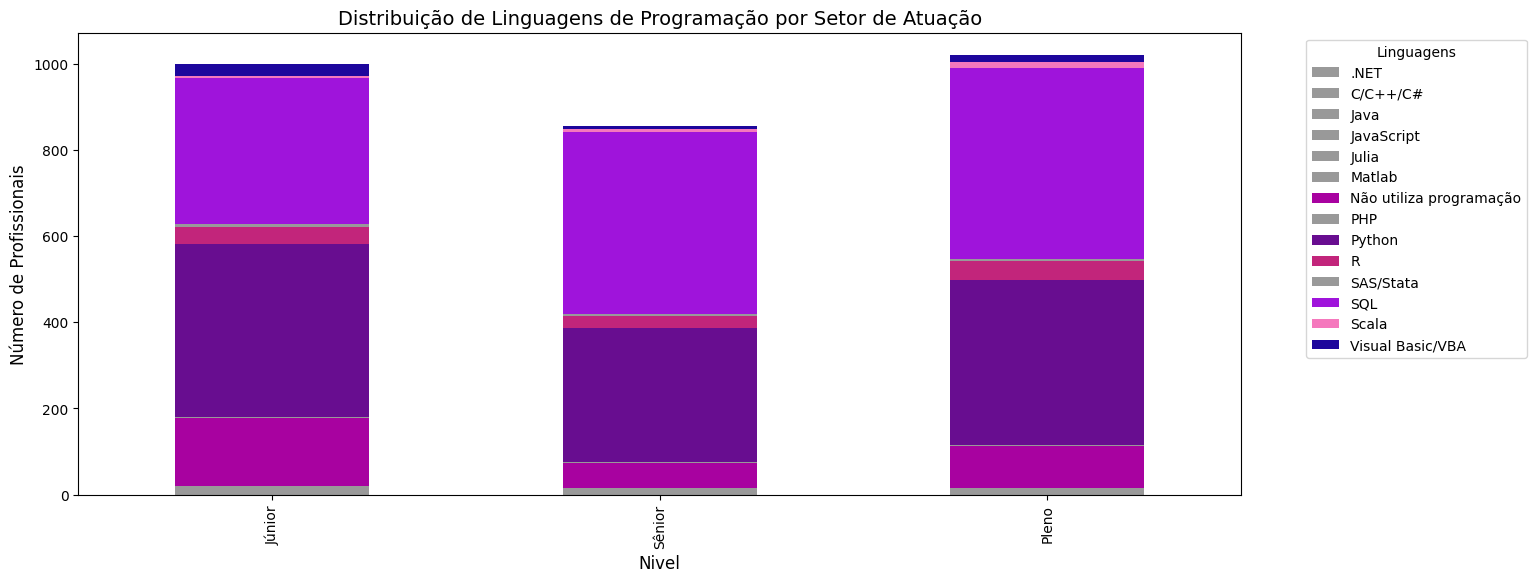

In [69]:
# Selecionar apenas as colunas relevantes
df_selecionado = df_final.select("Nivel", "Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?").filter(col("Nivel") != "Outro")

# Agrupar os dados e contar a frequência das linguagens em cada setor
contagem_linguagens_por_setor = df_selecionado.groupBy("Nivel", "Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?").count()

# Pivotar os dados para criar um DataFrame com as linguagens como colunas
pivot_df = contagem_linguagens_por_setor.groupBy("Nivel").pivot("Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?").sum("count")

# Converter o resultado em um DataFrame Pandas
pivot_df_pandas = pivot_df.toPandas()

# Criar um gráfico de barras empilhadas
cores = ['#999999', '#999999', '#999999', '#999999', '#999999', '#999999', '#A802A0', '#999999', '#680d90', '#C2257B', '#999999', '#9F14DB', '#F578BD', '#1D069C']
pivot_df_pandas.plot(kind='bar', x='Nivel', stacked=True, color=cores, figsize=(15, 6))
plt.title('Distribuição de Linguagens de Programação por Setor de Atuação', fontsize=14)
plt.xlabel('Nivel', fontsize=12)
plt.ylabel('Número de Profissionais', fontsize=12)
plt.legend(title='Linguagens', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **CONCLUSÃO**

Ao longo deste projeto de análise de dados, foi explorado detalhadamente o cenário do mercado de trabalho na área de dados no Brasil com base nos dados do State of Data Brazil 2022. A análise permitiu obter insights valiosos sobre tendências, desafios e oportunidades que permeiam esse setor em constante evolução.

A análise foi pautada em cinco hipóteses fundamentais, cada uma delas oferecendo uma perspectiva única sobre o mercado de trabalho em dados:

Hipótese 1: Profissionais mais jovens têm maior probabilidade de estar buscando oportunidades na área de dados, refletindo o dinamismo do mercado.

Após uma análise cuidadosa dos dados, confirmamos essa hipótese ao observar uma concentração de profissionais jovens buscando oportunidades na área de dados. Isso sugere a natureza dinâmica desse campo e a busca incessante por talentos jovens.

Hipótese 2: A remuneração média na área de dados varia significativamente entre diferentes setores de atuação, indicando disparidades salariais.

Ao investigar as médias salariais por setor de atuação, nossas descobertas revelaram que, de fato, existem disparidades salariais consideráveis entre os setores. Alguns setores, como a Indústria e o Governo, tendem a oferecer salários mais altos em comparação com outros, como Educação e Organizações sem Fins Lucrativos.

Hipótese 3: Profissionais com mais tempo de experiência tendem a ocupar cargos de nível hierárquico mais elevado, sugerindo um caminho de crescimento profissional.

A análise confirmou essa hipótese, mostrando que à medida que os profissionais ganham mais experiência na área de dados, eles têm maior probabilidade de ocupar cargos de nível mais elevado. Isso indica que a experiência é um fator-chave para a progressão na carreira nesse campo.

Hipótese 4: Existe uma correlação entre a faixa salarial e o nível de ensino, influenciando a retenção de talentos.

Embora explorada essa hipótese, não foi encontrada uma correlação clara entre a faixa salarial e o nível de ensino dos profissionais. Parece que outros fatores desempenham um papel mais significativo na determinação dos salários na área de dados.

Hipótese 5: Determinadas linguagens de programação são mais prevalentes em determinados setores de atuação, revelando preferências tecnológicas.

Ao analisar as preferências tecnológicas dos profissionais em diferentes setores, foi confirmado que certas linguagens de programação são de fato mais prevalentes em áreas específicas. Isso demonstra a importância das habilidades tecnológicas alinhadas com as necessidades de cada setor.

Em resumo, este projeto oferece uma visão holística do mercado de trabalho na área de dados no Brasil, auxiliando profissionais, empresas e formuladores de políticas a tomar decisões estratégicas informadas. Os dados e insights aqui apresentados representam um recurso valioso para navegar em um setor em constante crescimento e evolução.

À medida que o mercado continua a se transformar, a análise de dados desempenha um papel essencial na compreensão das complexidades e oportunidades disponíveis. Este projeto, com suas análises rigorosas e conclusões fundamentadas, contribui significativamente para o conhecimento e a capacitação daqueles que desejam prosperar no campo de dados no Brasil.